# Analysis Workflow: Reduction and Export
https://fermi.gsfc.nasa.gov/ssc/data/analysis/gbm/gbm_data_tools/gdt-docs/notebooks/PhaExport.html

In [2]:
# Análisis de GRB - 3 Bandas de Energía
# Destello: bn166509374 (del ejemplo)
# Detector: n0 (NaI)
# Bandas: 8-50 keV, 50-300 keV, 300-900 keV
print("=== ANÁLISIS DE GRB CON 3 BANDAS DE ENERGÍA ===")

=== ANÁLISIS DE GRB CON 3 BANDAS DE ENERGÍA ===


In [3]:
from gbm import test_data_dir
from gbm.data import Cspec
import matplotlib.pyplot as plt
import numpy as np
print("✅ Paquetes importados")

✅ Paquetes importados


In [4]:
print("=== DESTELLO bn090131090 ===")
print("=== DETECTOR n9 ===")

=== DESTELLO bn090131090 ===
=== DETECTOR n9 ===


In [5]:
from gbm import test_data_dir
from gbm.data import TTE
from gbm.binning.unbinned import bin_by_time

# open a TTE file
tte = TTE.open(test_data_dir+'/glg_tte_n9_bn090131090_v00.fit')
# bin to 1.024 s resolution, reference time is trigger time
phaii = tte.to_phaii(bin_by_time, 1.024, time_ref=0.0)

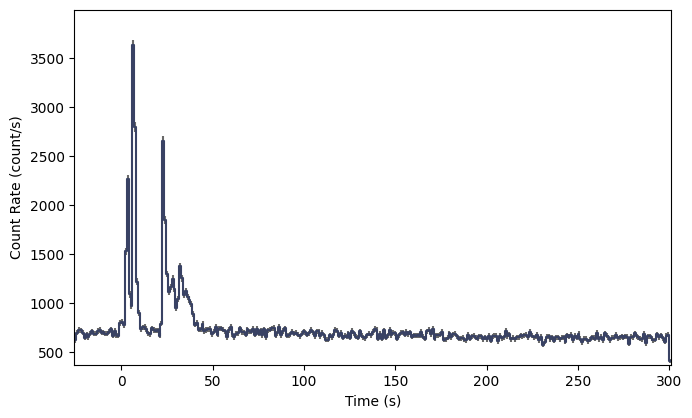

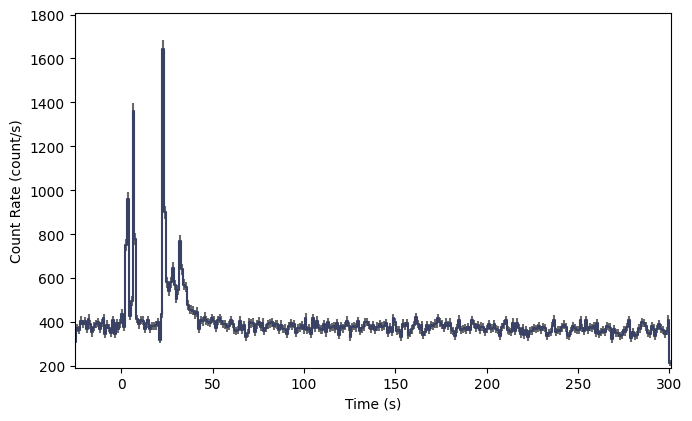

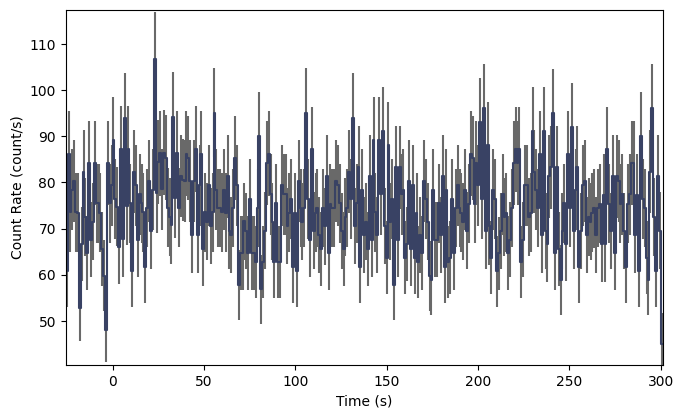

In [6]:
%matplotlib inline
from gbm.plot import Lightcurve, Spectrum
import matplotlib.pyplot as plt

#definimos nuestras 3 bandas de energia
%matplotlib inline
from gbm.plot import Lightcurve, Spectrum

erange1 = (8.0, 50.0)
erange2 = (50.0, 300.0)
erange3 = (300.0, 900.0)

#curvas de luz
lc_data1 = phaii.to_lightcurve(energy_range=erange1)  
lc_data2 = phaii.to_lightcurve(energy_range=erange2)
lc_data3 = phaii.to_lightcurve(energy_range=erange3)

# Lightcurve
lcplot1 = Lightcurve(data=lc_data1)
lcplot2 = Lightcurve(data=lc_data2) 
lcplot3 = Lightcurve(data=lc_data3)


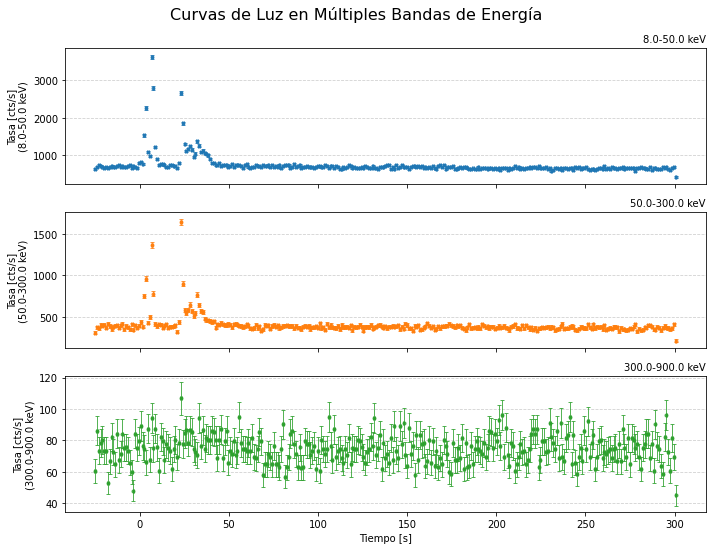

In [7]:
import matplotlib.pyplot as plt
import numpy as np 

# NO importamos Lightcurve de gbm.plot para evitar conflictos
from gbm.plot import Spectrum 

# ###################################################
# 1. Tu Definición y Obtención de Datos
# ###################################################
erange1 = (8.0, 50.0)
erange2 = (50.0, 300.0)
erange3 = (300.0, 900.0)

# Objetos de datos
lc_data1 = phaii.to_lightcurve(energy_range=erange1)
lc_data2 = phaii.to_lightcurve(energy_range=erange2)
lc_data3 = phaii.to_lightcurve(energy_range=erange3)

# ----------------------------------------------------
# 2. Preparar los datos y etiquetas
# ----------------------------------------------------
curvas_data = [
    {'data': lc_data1, 'label': f'{erange1[0]}-{erange1[1]} keV', 'color': 'C0'},
    {'data': lc_data2, 'label': f'{erange2[0]}-{erange2[1]} keV', 'color': 'C1'},
    {'data': lc_data3, 'label': f'{erange3[0]}-{erange3[1]} keV', 'color': 'C2'}
]

# ###################################################
# 3. Graficar con Matplotlib Puro (Usando 'centroids' y 'widths')
# ###################################################

# Crear la figura con 3 subplots que compartan el Eje X (tiempo)
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))
fig.suptitle('Curvas de Luz en Múltiples Bandas de Energía', fontsize=16)

for i, item in enumerate(curvas_data):
    ax = axes[i]
    data_obj = item['data']
    etiqueta = item['label']
    color = item['color']
    
    # 1. OBTENER LOS DATOS CLAVE (¡USANDO CENTROIDS Y WIDTHS!)
    # Estos atributos son para la posición media del bin.
    tiempo_mid = data_obj.centroids 
    ancho_bin = data_obj.widths # Ancho de cada bin (para barras de error horizontal)
    tasas = data_obj.rates 
    errores = data_obj.rate_uncertainty 
    
    # 2. Graficar los datos y los errores con Matplotlib.errorbar
    # Usamos errorbar para plotear el punto central y sus incertidumbres
    ax.errorbar(
        tiempo_mid, 
        tasas, 
        yerr=errores, 
        xerr=ancho_bin / 2.0, # El error en X es la mitad del ancho del bin
        fmt='o', # Plotea un punto (círculo) en el centro del bin
        markersize=3,
        capsize=2, 
        color=color,
        alpha=0.8,
        elinewidth=1.0,
        label=etiqueta
    )

    # 3. Configurar el eje
    ax.set_ylabel(f'Tasa [cts/s]\n({etiqueta})')
    ax.set_title(etiqueta, fontsize=10, loc='right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    
# Asegurarse de que el eje X (solo el inferior) esté etiquetado
axes[-1].set_xlabel('Tiempo [s]')

# Ajustar y mostrar
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [8]:
# We want two background intervals, one before and one after the source.
bkgd_times = [(-20.0, -5.0), (75.0, 200.0)]

In [9]:
# The backgrownd fitter interface
from gbm.background import BackgroundFitter
# Our fitting algorithmm
from gbm.background.binned import Polynomial

# We initialize our background fitter with the phaii object, the algorithm, and the time ranges to fit.
# If we wrere using an unbinned algorithm, we'd call .from_tte() and give it tte instead of phaii
backfitter = BackgroundFitter.from_phaii(phaii, Polynomial, time_ranges=bkgd_times)

# Once initialized, we can run the fit with the fitting parameters appropriate for our algorithm.
# 1st order polynomial
backfitter.fit(order=1)

In [10]:
backfitter.statistic/backfitter.dof

array([1.05253464, 0.97225381, 0.91227241, 0.98050048, 0.84681665,
       1.0109339 , 0.83987198, 0.99393676, 0.93546538, 0.97676709,
       1.06159651, 1.13014594, 1.02241299, 0.87300405, 0.93111584,
       0.77749972, 0.88585415, 1.24709709, 1.00078239, 1.18972735,
       1.08504497, 0.86004   , 1.09627527, 1.26029689, 1.02805267,
       1.09511262, 1.09453753, 0.84877554, 1.03829697, 1.18797705,
       1.17876657, 1.0435771 , 0.87277942, 1.1235214 , 0.75154049,
       1.16525405, 0.96174605, 0.86952962, 1.05345248, 1.06671789,
       0.98715977, 0.87106808, 0.81729816, 1.01830519, 0.96619755,
       0.96130275, 1.26006097, 1.10956129, 0.7465444 , 1.14112326,
       1.17921618, 0.99306683, 0.94085532, 0.75801103, 0.93522882,
       0.93297998, 1.34048725, 0.97457337, 0.92851687, 1.13544663,
       1.03582596, 0.86974828, 0.95736557, 0.90115499, 0.97121474,
       0.99067311, 1.03314964, 1.05197093, 0.67085108, 0.86989996,
       1.13958071, 0.79637932, 0.83125611, 0.96961894, 0.70648

In [11]:
bkgd = backfitter.interpolate_bins(phaii.data.tstart, phaii.data.tstop)
type(bkgd)

gbm.background.background.BackgroundRates

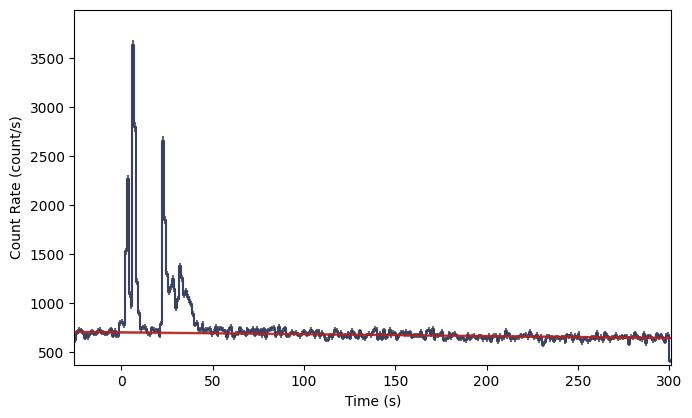

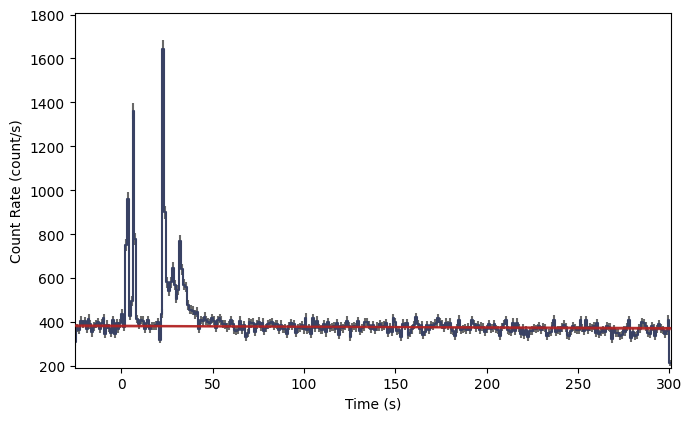

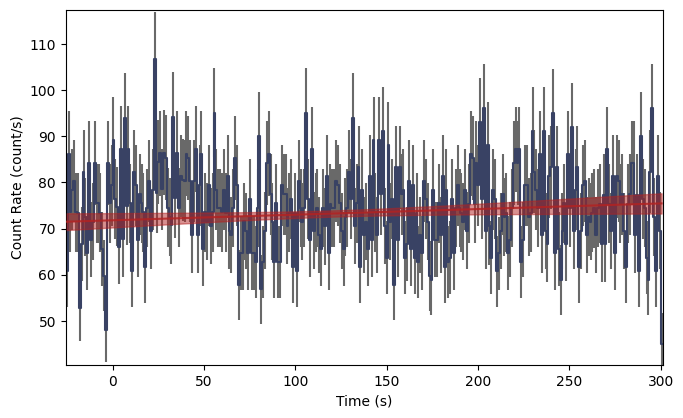

In [12]:
# Curva 1
lc_bkgd1 = bkgd.integrate_energy(*erange1)
lcplot1 = Lightcurve(data=lc_data1, background=lc_bkgd1)

# Curva 2
lc_bkgd2 = bkgd.integrate_energy(*erange2)
lcplot2 = Lightcurve(data=lc_data2, background=lc_bkgd2)

# Curva 2
lc_bkgd3 = bkgd.integrate_energy(*erange3)
lcplot3 = Lightcurve(data=lc_data3, background=lc_bkgd3)

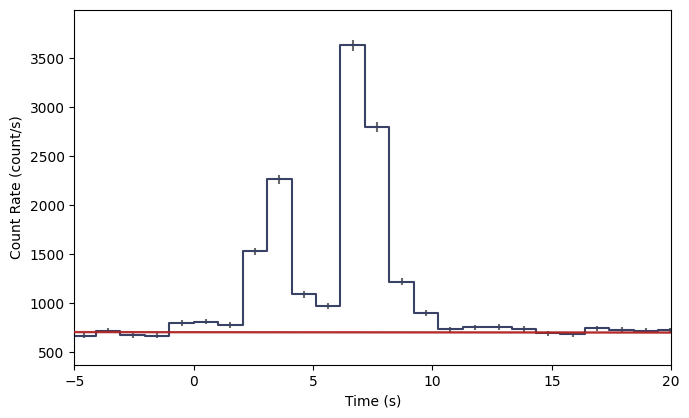

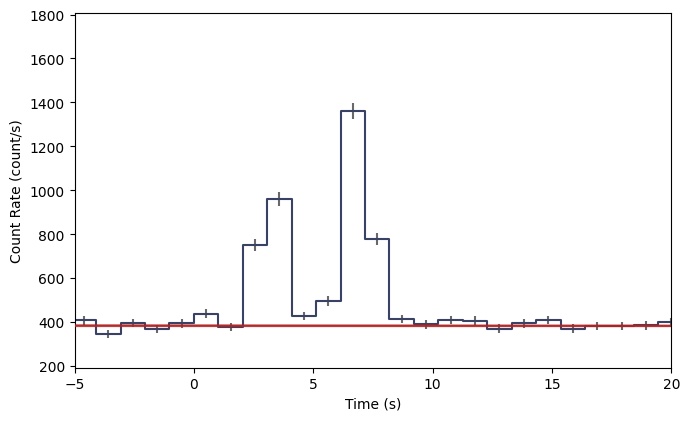

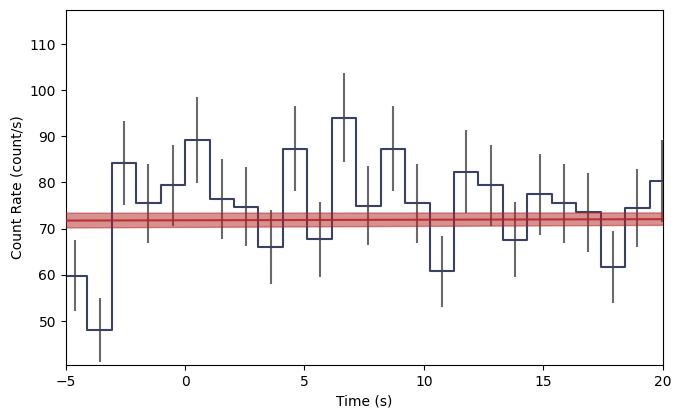

In [13]:
# Zoom in to 5 secconds before to 20 s after the trigger time
view_range = (-5.0, 20.0)

# Curva 1
lcplot1 = Lightcurve(data=lc_data1, background=lc_bkgd1)
lcplot1.xlim = view_range

# Curva 2
lcplot2 = Lightcurve(data=lc_data2, background=lc_bkgd2)
lcplot2.xlim = view_range

# Curva 3
lcplot3 = Lightcurve(data=lc_data3, background=lc_bkgd3)
lcplot3.xlim = view_range

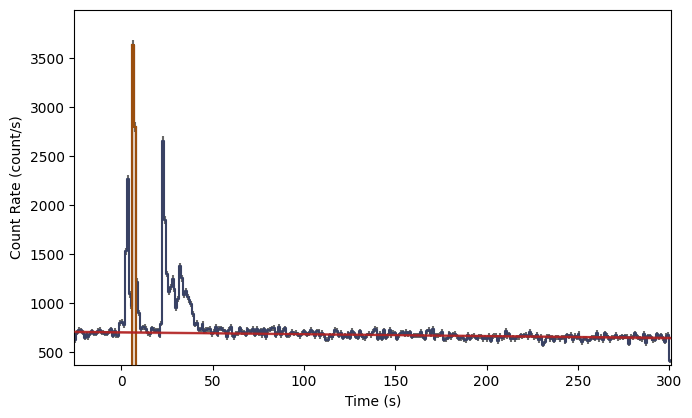

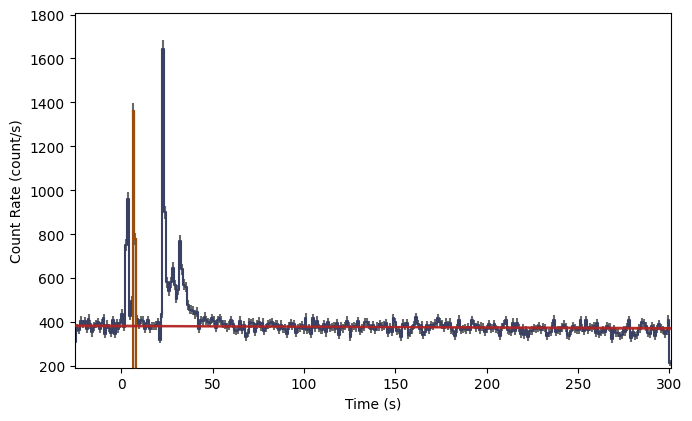

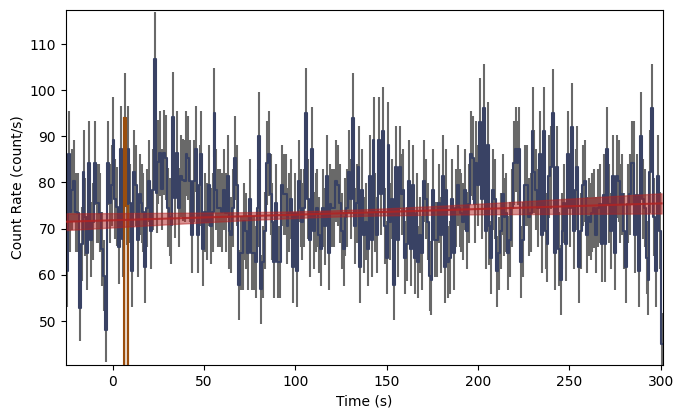

In [14]:
# Our lightcurve source selection
src_time = (7.0, 8.0)

# Curva 1
src_lc1 = phaii.to_lightcurve(time_range=src_time, energy_range=erange1)
lcplot1 = Lightcurve(data=lc_data1, background=lc_bkgd1)
lcplot1.add_selection(src_lc1)


# Curva 2
src_lc2 = phaii.to_lightcurve(time_range=src_time, energy_range=erange2)
lcplot2 = Lightcurve(data=lc_data2, background=lc_bkgd2)
lcplot2.add_selection(src_lc2)

# Curva 3
src_lc3 = phaii.to_lightcurve(time_range=src_time, energy_range=erange3)
lcplot3 = Lightcurve(data=lc_data3, background=lc_bkgd3)
lcplot3.add_selection(src_lc3)

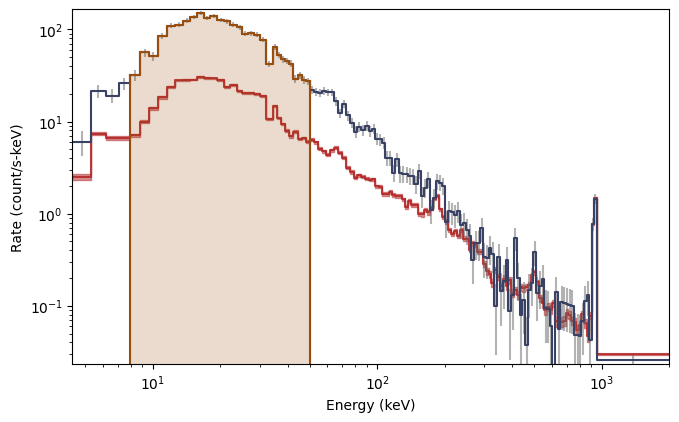

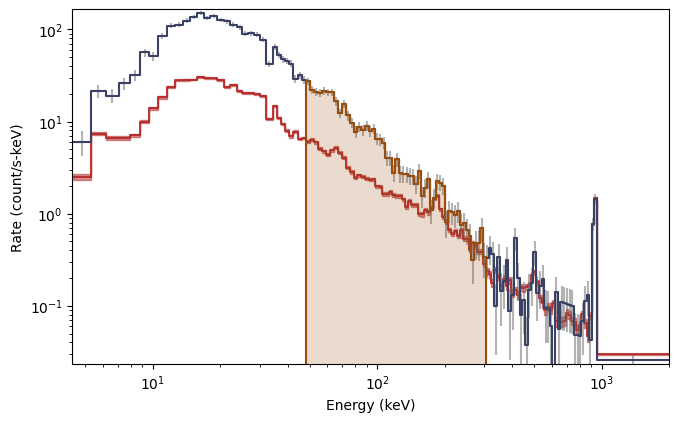

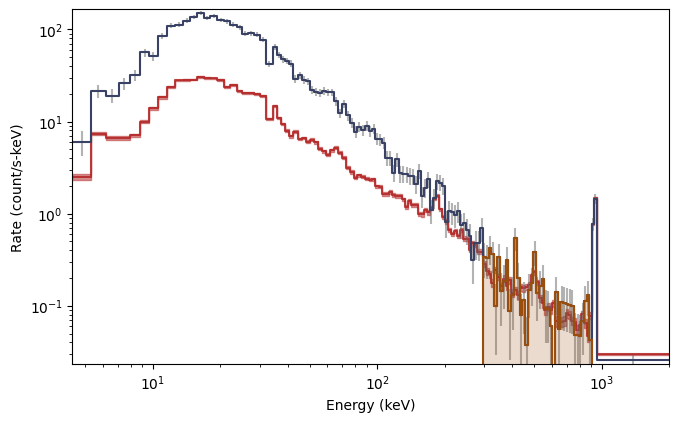

In [15]:
# Curva 1
# The observed count spectrun during the source selection
spec_data1 = phaii.to_spectrum(time_range=src_time)
# The background model integrated over the source selection time
spec_bkgd1 = bkgd.integrate_time(*src_time)
# The energy range selection that was made
spec_selection1 = phaii.to_spectrum(time_range=src_time, energy_range=erange1)

specplot1 = Spectrum(data=spec_data1, background=spec_bkgd1)
specplot1.add_selection(spec_selection1)

# Curva 2
# The observed count spectrum during the source selection
spec_data2 = phaii.to_spectrum(time_range=src_time)
# The background model integrated over the source selection time
spec_bkgd2 = bkgd.integrate_time(*src_time)
# The energy range selection that was made
spec_selection2 = phaii.to_spectrum(time_range=src_time, energy_range=erange2)

specplot2 = Spectrum(data=spec_data2, background=spec_bkgd2)
specplot2.add_selection(spec_selection2)

# Curva 3
# The observed count spectrum during the source selection
spec_data3 = phaii.to_spectrum(time_range=src_time)
# The background model integrated over the source selection time
spec_bkgd3 = bkgd.integrate_time(*src_time)
# The energy range selection that was made
spec_selection3 = phaii.to_spectrum(time_range=src_time, energy_range=erange3)

specplot3 = Spectrum(data=spec_data3, background=spec_bkgd3)
specplot3.add_selection(spec_selection3)